In [2]:
from mec_env_var import *
from helper import *
import tensorflow as tf
import ipdb as pdb
import time

for k in range(5,10):
    
    tf.reset_default_graph()
    
    print('---------' + str(k) + '------------')
    
    MAX_EPISODE = 100
    MAX_EPISODE_LEN = 10000

    NUM_T = 1
    NUM_R = 4
    SIGMA2 = 1e-9

    t_factor = 0.2
    epsilon = 1.0

    config = {'state_dim':3, 'action_dim':2};
    train_config = {'minibatch_size':64, 'actor_lr':0.0001, 'tau':0.001, 
                    'critic_lr':0.001, 'gamma':0.99, 'buffer_size':250000, 
                    'random_seed':int(time.clock()*1000%1000), 'epsilon':epsilon, 'sigma2':SIGMA2}
    
    IS_TRAIN = False
#     rate = 3.0
    res_path = 't_M_02_nB_dqn/'
    model_path = 'model_M_02_nB_dqn/my_train_model_'+str(k)+'-2000'
    meta_path = model_path+'.meta'
    init_path = ''
    
    user_config = [{'id':'1', 'model':'AR', 'num_r':NUM_R, 'rate':1.0, 'dis':100, 'action_bound':2, 
                    'data_buf_size':100, 't_factor':t_factor, 'penalty':1000, 'action_level':5},
                   {'id':'2', 'model':'AR', 'num_r':NUM_R, 'rate':2.0, 'dis':100, 'action_bound':2, 
                    'data_buf_size':100, 't_factor':t_factor, 'penalty':1000, 'action_level':5},
                   {'id':'3', 'model':'AR', 'num_r':NUM_R, 'rate':3.0, 'dis':100, 'action_bound':2, 
                    'data_buf_size':100, 't_factor':t_factor, 'penalty':1000, 'action_level':5}]

    print(user_config)
    # 0. initialize the session object
    sess = tf.Session() 

    # gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.2)
    # sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) 

    # 1. include all user in the system according to the user_config
    user_list = [];
    for info in user_config:
        info.update(config)
        info['model_path'] = model_path
        info['meta_path'] = info['model_path']+'.meta'
        info['init_path'] = init_path
        user_list.append(MecTermDQN_LD(sess, info, train_config))
        print('Initialization OK!----> user ' + info['id'])

    # 2. create the simulation env
    env = MecSvrEnv(user_list, NUM_R, SIGMA2, MAX_EPISODE_LEN)

#     sess.run(tf.global_variables_initializer())
    
#     tflearn.config.is_training(is_training=IS_TRAIN, session=sess)

#     env.init_target_network()

    res_r = []
    res_p = []
    res_b = []
    res_o = []
    res_d = []
    # 3. start to explore for each episode
    for i in range(MAX_EPISODE):

        cur_init_ds_ep = env.reset()

        cur_r_ep = np.zeros(len(user_list))
        cur_p_ep = np.zeros(len(user_list))
        cur_op_ep = np.zeros(len(user_list))
        cur_ts_ep = np.zeros(len(user_list))
        cur_ps_ep = np.zeros(len(user_list))
        cur_rs_ep = np.zeros(len(user_list))
        cur_ds_ep = np.zeros(len(user_list))
        cur_ch_ep = np.zeros(len(user_list))
        cur_of_ep = np.zeros(len(user_list))

        for j in range(MAX_EPISODE_LEN):

            # first try to transmit from current state
            [cur_r, done, cur_p, cur_op, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of] = env.step_transmit()

            cur_r_ep += cur_r
            cur_p_ep += cur_p
            cur_op_ep += cur_op
            cur_ts_ep += cur_ts
            cur_ps_ep += cur_ps
            cur_rs_ep += cur_rs
            cur_ds_ep += cur_ds
            cur_ch_ep += cur_ch
            cur_of_ep += cur_of


            if done:
                res_r.append(cur_r_ep/MAX_EPISODE_LEN)
                res_p.append(cur_p_ep/MAX_EPISODE_LEN)
                res_b.append(cur_ds_ep/MAX_EPISODE_LEN)
                res_o.append(cur_of_ep/MAX_EPISODE_LEN)
                res_d.append(cur_ds)
                print('%d:r:%s,p:%s,op:%s,tr:%s,pr:%s,rev:%s,dbuf:%s,ch:%s,ibuf:%s,rbuf:%s' % (i, cur_r_ep/MAX_EPISODE_LEN, cur_p_ep/MAX_EPISODE_LEN, cur_op_ep/MAX_EPISODE_LEN, cur_ts_ep/MAX_EPISODE_LEN, cur_ps_ep/MAX_EPISODE_LEN, cur_rs_ep/MAX_EPISODE_LEN, cur_ds_ep/MAX_EPISODE_LEN, cur_ch_ep/MAX_EPISODE_LEN, cur_init_ds_ep, cur_ds))

    name = res_path+'test_1000_' + time.strftime("%b_%d_%Y_%H_%M_%S", time.localtime(time.time()))
    np.savez(name, res_r, res_p, res_b, res_o, res_d)
    
    sess.close()

---------5------------
[{'penalty': 1000, 'num_r': 4, 'rate': 1.0, 'action_bound': 2, 'data_buf_size': 100, 'action_level': 5, 'model': 'AR', 'id': '1', 't_factor': 0.2, 'dis': 100}, {'penalty': 1000, 'num_r': 4, 'rate': 2.0, 'action_bound': 2, 'data_buf_size': 100, 'action_level': 5, 'model': 'AR', 'id': '2', 't_factor': 0.2, 'dis': 100}, {'penalty': 1000, 'num_r': 4, 'rate': 3.0, 'action_bound': 2, 'data_buf_size': 100, 'action_level': 5, 'model': 'AR', 'id': '3', 't_factor': 0.2, 'dis': 100}]
INFO:tensorflow:Restoring parameters from model_M_02_nB_dqn/my_train_model_5-2000
Initialization OK!----> user 1
INFO:tensorflow:Restoring parameters from model_M_02_nB_dqn/my_train_model_5-2000
Initialization OK!----> user 2
INFO:tensorflow:Restoring parameters from model_M_02_nB_dqn/my_train_model_5-2000
Initialization OK!----> user 3
0:r:[ -4.08118994  -5.62761143 -10.55367218],p:[0.47876937 1.31489369 1.84498996],op:[1.12053063 0.20940631 0.05501004],tr:[0.20828019 1.20794007 1.37836532],pr

21:r:[ -4.04634378  -5.59686514 -10.65119577],p:[0.47516499 1.31702274 1.85354425],op:[1.09513501 0.19827726 0.05195575],tr:[0.15893906 1.22279954 1.35591472],pr:[2.23643495 1.15928085 1.83909948],rev:[1.016  1.9935 2.9934],dbuf:[1.13217973 3.20783143 8.55024471],ch:[3.96947896 4.02590324 3.99262123],ibuf:[7.5, 25.0, 18.5],rbuf:[2.         1.59986403 4.77153283]
22:r:[ -4.09048467  -5.6268928  -10.33088305],p:[0.46874698 1.30989647 1.83181949],op:[1.12410302 0.22200353 0.05353051],tr:[0.17908332 1.25276669 1.3814094 ],pr:[2.25391285 1.17438692 1.82486698],rev:[1.0108 1.9792 3.0042],dbuf:[1.13098084 3.20386601 8.20022881],ch:[4.09675056 4.19329487 4.16927675],ibuf:[30.0, 13.5, 24.5],rbuf:[1.         6.57980202 7.70149209]
23:r:[ -4.13184899  -5.69026477 -11.0787864 ],p:[0.48658025 1.33945242 1.88651045],op:[1.12611975 0.19979758 0.04048955],tr:[0.21387295 1.2119441  1.33846832],pr:[2.24676948 1.18735425 1.8506823 ],rev:[1.0036 2.0096 3.0357],dbuf:[1.13306124 3.26470596 9.03098299],ch:[4

44:r:[ -4.02998706  -5.61139326 -10.48126776],p:[0.45168498 1.31498585 1.83614834],op:[1.12251502 0.20031415 0.04040166],tr:[0.15066254 1.25001208 1.33705721],pr:[2.24479714 1.15077149 1.83446695],rev:[0.9922 2.0059 3.007 ],dbuf:[1.10198382 3.22599158 8.4102097 ],ch:[3.9423146  4.01463994 3.91134252],ibuf:[3.0, 5.0, 4.5],rbuf:[ 2.          1.80704454 25.5252788 ]
45:r:[ -4.08665403  -5.5815794  -11.89397807],p:[0.47504876 1.30576255 1.87227335],op:[1.12505124 0.19993745 0.04697665],tr:[0.20320457 1.21534878 1.35053982],pr:[2.24866985 1.1629499  1.84577738],rev:[1.0024 1.9812 3.0124],dbuf:[ 1.10806754  3.21272425 10.06934759],ch:[4.11783629 3.92718332 3.92018382],ibuf:[2.0, 39.5, 44.0],rbuf:[1.         3.21112582 6.91394898]
46:r:[ -4.08911199  -5.62249645 -10.62738606],p:[0.47681644 1.3166313  1.8477362 ],op:[1.11323356 0.2213187  0.0461138 ],tr:[0.18318929 1.23791909 1.33613942],pr:[2.25031532 1.1838569  1.83680593],rev:[1.0125 1.9736 3.0003],dbuf:[1.13626499 3.18324556 8.54960757],ch

67:r:[ -4.03631033  -5.67665547 -10.31352005],p:[0.45648581 1.34265616 1.80705191],op:[1.12096419 0.20419384 0.05314809],tr:[0.16479814 1.2392657  1.35226348],pr:[2.24822453 1.1886457  1.81906837],rev:[0.9862 2.0258 2.9686],dbuf:[1.10176291 3.22869434 8.24140006],ch:[3.9499141  3.9201578  4.00406456],ibuf:[24.5, 39.5, 36.5],rbuf:[1.         6.94091902 5.10578605]
68:r:[ -4.0660946   -5.62867685 -10.80701603],p:[0.47437987 1.32165452 1.85278312],op:[1.10097013 0.21759548 0.04776688],tr:[0.15038343 1.26093805 1.35909708],pr:[2.24647538 1.18139004 1.8383644 ],rev:[1.0167 2.0064 3.0031],dbuf:[1.14424325 3.18772107 8.75739504],ch:[3.97706261 4.05541662 3.91867076],ibuf:[12.5, 29.5, 47.0],rbuf:[3.        0.7707388 3.       ]
69:r:[ -4.0872926   -5.56098415 -10.52420268],p:[0.4740864  1.2997799  1.85363865],op:[1.1125636  0.2121701  0.05366135],tr:[0.17167873 1.25191049 1.36813853],pr:[2.25095948 1.15518299 1.82782608],rev:[1.021  1.995  2.9839],dbuf:[1.14249075 3.17135519 8.38700335],ch:[3.9

90:r:[ -4.03246389  -5.60408553 -10.69672741],p:[0.45026052 1.32275126 1.84345444],op:[1.11613948 0.20599874 0.04759556],tr:[0.14109955 1.21664252 1.34976782],pr:[2.24853529 1.18398598 1.83318387],rev:[0.9954 2.0006 3.0052],dbuf:[1.12457987 3.18323192 8.64328427],ch:[3.84091248 3.84788332 3.93497238],ibuf:[19.5, 23.0, 11.5],rbuf:[0.         7.32680213 5.15058241]
91:r:[ -4.03908267  -5.60115661 -10.58948216],p:[0.46117518 1.31279497 1.82863129],op:[1.11497482 0.21195503 0.03716871],tr:[0.15540081 1.24187133 1.29440009],pr:[2.2457723  1.16689312 1.83987331],rev:[0.9929 1.9928 2.9921],dbuf:[1.10847834 3.18957077 8.5723527 ],ch:[3.84330738 4.02056246 3.82452345],ibuf:[13.0, 40.0, 3.0],rbuf:[1.         5.         4.97449523]
92:r:[ -4.06587842  -5.61999607 -10.42475963],p:[0.46219323 1.32340903 1.82289765],op:[1.11595677 0.19694097 0.04715235],tr:[0.15819161 1.23825344 1.322477  ],pr:[2.24572727 1.16201704 1.83733704],rev:[0.9989 2.0065 2.9809],dbuf:[1.13697303 3.22412008 8.35582454],ch:[3

11:r:[-4.54563566 -5.42887176 -9.43969256],p:[0.99888399 1.35769862 1.85335354],op:[0.83676601 0.33635138 0.15869646],tr:[1.29518688 1.43493661 1.48578355],pr:[1.87477573 1.53678553 1.88871735],rev:[0.9999 1.9851 3.    ],dbuf:[1.09291957 2.55096469 6.7694907 ],ch:[4.01387714 3.97519714 4.00030066],ibuf:[40.5, 22.0, 20.0],rbuf:[2.         0.86471061 6.79530889]
12:r:[-4.40443955 -5.42782375 -9.68585944],p:[0.9547911  1.35310627 1.87468118],op:[0.8280089  0.32704373 0.15221882],tr:[1.20552274 1.39709724 1.45696503],pr:[1.88734977 1.53809684 1.90221261],rev:[1.0006 1.9977 3.0087],dbuf:[1.04854943 2.58440468 7.04007431],ch:[3.84254478 3.88933035 3.88946287],ibuf:[6.5, 7.5, 1.0],rbuf:[ 0.          1.         12.27669941]
13:r:[-4.53183862 -5.46154876 -9.81483909],p:[1.00443285 1.35966515 1.87849293],op:[0.84361715 0.31963485 0.15090707],tr:[1.27789513 1.3928047  1.42573024],pr:[1.87948716 1.53449626 1.9100358 ],rev:[0.9937 1.9918 2.9964],dbuf:[1.04467327 2.62868596 7.19504887],ch:[4.0912785

34:r:[-4.51083473 -5.40309145 -9.63370103],p:[0.99438796 1.3450967  1.87223517],op:[0.83991204 0.3233033  0.14941483],tr:[1.29317119 1.38911725 1.48959626],pr:[1.88214248 1.52950887 1.8892647 ],rev:[1.0028 1.9901 3.0313],dbuf:[1.05279342 2.58286431 6.98800128],ch:[4.06089945 3.99022786 4.12327933],ibuf:[1.5, 21.0, 30.0],rbuf:[1. 5. 5.]
35:r:[-4.42809548 -5.49191223 -9.72507564],p:[0.96452041 1.35062253 1.88464656],op:[0.83607959 0.32832747 0.15525344],tr:[1.25439498 1.41474775 1.48716309],pr:[1.88469373 1.54419569 1.90212619],rev:[0.9903 2.0175 3.0246],dbuf:[1.03361935 2.66751529 7.05659455],ch:[3.89601378 3.96744077 3.99331779],ibuf:[2.5, 21.5, 8.5],rbuf:[1.        3.5321389 2.       ]
36:r:[-4.56387891 -5.42083924 -9.29865447],p:[0.99266165 1.34489724 1.83990156],op:[0.83598835 0.32680276 0.16069844],tr:[1.29244525 1.38703567 1.49225136],pr:[1.87351729 1.53671938 1.87404348],rev:[0.9951 1.9851 2.9844],dbuf:[1.13322363 2.59679905 6.62181809],ch:[4.04777356 3.95911378 4.00424274],ibuf:

57:r:[-4.55744234 -5.4460628  -9.52507645],p:[0.98093079 1.35291762 1.8580245 ],op:[0.84146921 0.32903238 0.1543255 ],tr:[1.24152543 1.3889209  1.45854204],pr:[1.90282357 1.54240155 1.89171127],rev:[1.0088 2.0004 2.9947],dbuf:[1.14080292 2.6027035  6.87547056],ch:[3.99419233 3.95216139 3.9958135 ],ibuf:[44.0, 28.0, 34.0],rbuf:[ 2.          1.8737265  16.80436294]
58:r:[-4.49769762 -5.4693613  -9.4387992 ],p:[0.99186817 1.35575268 1.83206281],op:[0.83408183 0.33174732 0.15348719],tr:[1.3097134  1.44301181 1.47203273],pr:[1.87042355 1.53151011 1.87917923],rev:[0.9985 2.0012 2.9844],dbuf:[1.05724702 2.61795162 6.834624  ],ch:[4.00445829 4.08291582 3.87065235],ibuf:[20.5, 35.0, 43.5],rbuf:[1.         2.         1.28450186]
59:r:[-4.52467809 -5.46705761 -9.7714559 ],p:[0.98421746 1.36473245 1.89143595],op:[0.83588254 0.32111755 0.14551405],tr:[1.2917872  1.44872501 1.46900899],pr:[1.88013747 1.51611432 1.90126576],rev:[1.0063 2.0071 3.0314],dbuf:[1.10559762 2.61919701 7.12194487],ch:[3.9926

80:r:[-4.51360406 -5.3771323  -9.49578585],p:[0.99566485 1.34266008 1.85942257],op:[0.84033515 0.32528992 0.15817743],tr:[1.32427124 1.44487075 1.46823205],pr:[1.87279074 1.51856907 1.89747575],rev:[1.0043 1.9948 3.0041],dbuf:[1.05200507 2.55154038 6.82573231],ch:[4.06048818 4.11187097 3.95663753],ibuf:[10.5, 1.5, 18.0],rbuf:[0.         4.         2.01310327]
81:r:[-4.44483166 -5.39051964 -9.79567697],p:[0.9688372  1.33952448 1.890402  ],op:[0.8359128  0.31712552 0.145898  ],tr:[1.26301653 1.41680732 1.43918531],pr:[1.87989241 1.51072275 1.90872472],rev:[0.9928 1.996  3.0118],dbuf:[1.04416458 2.59652455 7.15384622],ch:[3.93780848 4.18286113 3.83878143],ibuf:[14.0, 5.5, 18.5],rbuf:[1.         2.46729294 9.80243795]
82:r:[-4.5529155  -5.44364439 -9.54757285],p:[1.01102203 1.3589001  1.86370138],op:[0.84452797 0.3301999  0.15949862],tr:[1.34394652 1.42357181 1.49317382],pr:[1.87680829 1.53578259 1.89073767],rev:[1.0047 1.9979 3.0006],dbuf:[1.05226938 2.58180548 6.87646606],ch:[4.13027812 

1:r:[ -3.80442744  -6.64455255 -93.32501049],p:[0.7195178  1.26310558 2.08510017],op:[7.01332198e-01 1.21894417e-01 2.99830953e-04],tr:[0.60907077 0.9306961  0.85217772],pr:[1.87897953 1.3585917  2.15013779],rev:[1.0035 2.0175 3.0131],dbuf:[  1.2034093    4.84319069 111.44276311],ch:[3.92248392 3.93968683 4.01499971],ibuf:[34.0, 6.0, 2.0],rbuf:[  0.           7.55610032 113.29539769]
2:r:[ -3.84900322  -6.76705141 -93.64505205],p:[0.72878248 1.25785806 2.12275   ],op:[0.72041752 0.15814194 0.        ],tr:[0.65381184 0.92126869 0.82967861],pr:[1.88629089 1.4072454  2.16775098],rev:[0.9973 2.0036 3.0054],dbuf:[  1.18825402   4.91881427 111.74944006],ch:[4.02151803 4.0960215  3.82421807],ibuf:[36.0, 28.5, 37.5],rbuf:[  2.           8.50686579 117.20403725]
3:r:[ -3.83704958  -6.52480023 -93.98419407],p:[0.72015067 1.25215559 2.11095   ],op:[0.71499933 0.13374441 0.        ],tr:[0.64524121 0.93281623 0.82834652],pr:[1.88619607 1.35819705 2.15697727],rev:[1.0004 2.0047 2.9925],dbuf:[  1.208

23:r:[ -3.81957824  -6.47880605 -93.18413897],p:[0.72601749 1.23829703 2.07355062],op:[7.20182513e-01 1.51152971e-01 4.99375012e-04],tr:[0.64899634 0.93865475 0.85202515],pr:[1.88715139 1.37583317 2.13144949],rev:[1.009  1.9913 2.9933],dbuf:[  1.15897279   4.62488256 111.29504872],ch:[4.01159255 4.04549534 3.9958612 ],ibuf:[8.0, 30.5, 1.0],rbuf:[  1.           0.         110.15447859]
24:r:[ -3.75972639 -66.77414177 -93.50063366],p:[0.70891619 1.57661134 2.12218206],op:[7.09433807e-01 7.24886595e-02 1.79398239e-05],tr:[0.60203874 1.36464674 0.85570493],pr:[1.88326078 0.82142506 2.15311257],rev:[1.0043 2.0183 3.0195],dbuf:[  1.15378299  79.34492722 111.57029207],ch:[3.86392408 3.83039552 4.05628559],ibuf:[14.5, 38.0, 2.5],rbuf:[  1.           5.25958435 109.53713145]
25:r:[ -3.77650646  -6.56508749 -93.56425524],p:[0.71018014 1.26530409 2.0856    ],op:[0.71766986 0.14309591 0.        ],tr:[0.62595461 0.91674186 0.84845565],pr:[1.88246355 1.40547637 2.14345163],rev:[1.008 2.021 3.001],db

45:r:[ -3.94654763  -6.61585926 -93.29488589],p:[0.74539982 1.25912929 2.08295   ],op:[0.75070018 0.13367071 0.        ],tr:[0.70216835 0.93275651 0.8432683 ],pr:[1.91125032 1.34868114 2.14769545],rev:[1.0011 1.982  3.0013],dbuf:[  1.19293454   4.78782407 111.41123236],ch:[4.2486209  4.00554741 4.04085543],ibuf:[45.5, 47.0, 6.0],rbuf:[  2.28036241   1.         109.362461  ]
46:r:[ -3.84191577  -6.49299542 -93.85920585],p:[0.72820098 1.24805099 2.1172    ],op:[0.73979902 0.13839901 0.        ],tr:[0.6715387  0.90268124 0.88423113],pr:[1.90701583 1.38640583 2.14631068],rev:[0.9945 1.9932 3.039 ],dbuf:[  1.13239471   4.65011928 112.03100731],ch:[4.10302803 3.83261039 4.0469813 ],ibuf:[21.5, 13.5, 23.5],rbuf:[  0.           0.         108.08187183]
47:r:[ -3.82313045  -6.6345945  -93.15865186],p:[0.72861136 1.24311618 2.0822    ],op:[0.72793864 0.14748382 0.        ],tr:[0.66427854 0.91565681 0.86101327],pr:[1.89367316 1.39698118 2.13018821],rev:[1.003  2.0056 2.9997],dbuf:[  1.13753806   

67:r:[ -3.70970515  -6.51169937 -93.45094334],p:[0.68561715 1.25443064 2.06325   ],op:[0.71663285 0.13711936 0.        ],tr:[0.60904797 0.9408867  0.87319994],pr:[1.89087447 1.37378975 2.12411916],rev:[0.9898 2.0011 3.0048],dbuf:[  1.13150643   4.66074921 111.65555417],ch:[3.98637684 3.99140824 4.09026649],ibuf:[15.0, 28.5, 36.0],rbuf:[  0.           6.68209904 110.80907724]
68:r:[ -3.84469045  -6.40596663 -93.23897701],p:[0.73827777 1.25109957 2.07405   ],op:[0.72652223 0.16400043 0.        ],tr:[0.68050014 0.94779086 0.8486462 ],pr:[1.88754373 1.39214737 2.12846032],rev:[1.0059 2.0095 2.9854],dbuf:[  1.14386306   4.46970829 111.36359626],ch:[4.16670344 4.16893208 4.00473777],ibuf:[14.0, 15.5, 30.5],rbuf:[  2.           6.92963757 113.43479351]
69:r:[ -3.8575136   -6.51901235 -93.88293609],p:[0.72855603 1.24713841 2.07865   ],op:[0.72154397 0.14891159 0.        ],tr:[0.64827703 0.90857146 0.83972409],pr:[1.89434414 1.39222538 2.14077956],rev:[0.9989 2.0019 2.9879],dbuf:[  1.196642    

89:r:[ -3.83119558  -6.81046327 -92.5303254 ],p:[0.72014567 1.25946426 2.09172856],op:[0.70760433 0.15808574 0.00222144],tr:[0.63829706 0.94281434 0.86318038],pr:[1.87518165 1.37756918 2.13865681],rev:[1.0032 1.991  3.0051],dbuf:[  1.21961948   4.96920409 110.42803175],ch:[3.92726463 4.16252197 4.10222176],ibuf:[40.5, 41.0, 35.0],rbuf:[  0.           5.67667283 111.72290816]
90:r:[ -3.83615673  -6.8031569  -93.08553955],p:[0.73191951 1.27637205 2.0705    ],op:[0.71338049 0.13292795 0.        ],tr:[0.64509201 0.92241925 0.8372769 ],pr:[1.88508121 1.37970172 2.12994378],rev:[1.0071 2.0199 2.9763],dbuf:[  1.18194591   4.98069612 111.18067443],ch:[4.00974086 4.00831024 3.95568383],ibuf:[41.0, 0.5, 25.5],rbuf:[  0.           2.         116.29320313]
91:r:[ -3.75380152  -6.59860587 -92.96572559],p:[0.7096788 1.2653278 2.11185  ],op:[0.7048712 0.1392722 0.       ],tr:[0.60112934 0.92497176 0.86623496],pr:[1.87761718 1.37423197 2.14858145],rev:[1.0073 1.9956 3.0253],dbuf:[  1.1558769    4.7367

9:r:[ -5.33321475  -6.86095914 -37.05256164],p:[1.54664183 1.04114859 2.04045   ],op:[0.45615817 0.53635141 0.        ],tr:[1.70784395 0.89920428 1.365336  ],pr:[1.38872745 1.95904749 1.66850487],rev:[1.0097 2.0118 3.0369],dbuf:[ 1.65951843  4.63244892 41.21457705],ch:[4.00066865 4.07641308 4.01579149],ibuf:[17.5, 4.5, 3.0],rbuf:[ 1.          2.13880276 33.59124173]
10:r:[ -5.21451856  -6.95306025 -34.78990251],p:[1.53352269 1.03596789 1.98961893],op:[0.44022731 0.53823211 0.00083107],tr:[1.69147806 0.89258526 1.41669459],pr:[1.37082714 1.95990988 1.56883759],rev:[0.9887 1.9962 2.9863],dbuf:[ 1.5837732   4.75582531 38.51125314],ch:[3.87096388 4.05643397 4.13389658],ibuf:[5.0, 3.5, 10.5],rbuf:[ 0.          0.         32.38496242]
11:r:[ -5.35525213  -6.71938888 -35.26504541],p:[1.52248053 1.02333838 1.99343373],op:[0.47451947 0.53976162 0.00136627],tr:[1.67669768 0.87799027 1.38816732],pr:[1.41069926 1.95859365 1.59381001],rev:[1.0051 1.9736 2.981 ],dbuf:[ 1.70156517  4.4914861  39.0943

31:r:[ -5.3340407   -7.0305177  -36.63633448],p:[1.54419767 1.02219177 2.03092627],op:[0.45930233 0.50155823 0.00227373],tr:[1.72703392 0.84595233 1.36016919],pr:[1.39770231 1.94463285 1.65045771],rev:[0.9995 1.996  3.0113],dbuf:[ 1.65880087  4.97877213 40.7124181 ],ch:[3.9842893  3.94286689 4.02052589],ibuf:[4.5, 41.5, 14.5],rbuf:[ 2.          1.         53.00174583]
32:r:[ -5.42360773  -6.83921115 -35.42227783],p:[1.52502318 1.02933873 1.99551242],op:[4.52576823e-01 5.32311267e-01 4.87579946e-04],tr:[1.69173487 0.8654263  1.38843422],pr:[1.37466511 1.95658374 1.58818987],rev:[1.0174 1.989  2.9791],dbuf:[ 1.83550966  4.64488894 39.28784728],ch:[3.96459779 3.9242534  4.10758024],ibuf:[48.5, 49.0, 5.5],rbuf:[ 1.71057151  2.         40.0947725 ]
33:r:[ -5.4073169   -6.95586971 -36.41672315],p:[1.55082182 1.02233788 2.0335635 ],op:[4.65828177e-01 5.14212123e-01 3.36498803e-04],tr:[1.6787747  0.85315638 1.37239079],pr:[1.41089166 1.94952237 1.63543816],rev:[1.0187 1.9879 3.0082],dbuf:[ 1.7

53:r:[ -5.341148    -6.93685597 -36.75703151],p:[1.52465729 1.04294003 2.02003355],op:[0.44424271 0.50695997 0.00136645],tr:[1.66742695 0.86133108 1.35091993],pr:[1.37294675 1.95008539 1.64536429],rev:[0.9997 2.0032 2.9947],dbuf:[ 1.754185    4.79631996 40.89278939],ch:[3.92271915 4.01680573 4.01662692],ibuf:[47.0, 15.5, 27.5],rbuf:[ 8.98351292 15.43401554 34.43224188]
54:r:[ -5.2524466   -7.00398825 -36.4332415 ],p:[1.54427468 1.03828404 1.98675591],op:[0.47022532 0.52236596 0.00094409],tr:[1.72671912 0.88594967 1.33409059],pr:[1.40677965 1.9545721  1.64243397],rev:[0.9803 2.0061 2.977 ],dbuf:[ 1.52930825  4.85336032 40.57230187],ch:[4.03985111 4.03265858 3.92459061],ibuf:[10.0, 18.0, 29.0],rbuf:[ 2.          1.         46.72934044]
55:r:[ -5.36789159  -6.76632043 -35.11174028],p:[1.54851169 1.0317566  1.98566439],op:[0.44908831 0.5238934  0.00438561],tr:[1.72399307 0.88180508 1.43784073],pr:[1.38322748 1.95425893 1.55767645],rev:[1.0066 2.0002 2.9863],dbuf:[ 1.71586449  4.56877554 38

76:r:[ -5.34729158  -7.11921466 -36.27145719],p:[1.54975701 1.04837593 1.99516032],op:[0.46534299 0.50092407 0.00068968],tr:[1.73790276 0.86724948 1.34575708],pr:[1.40123834 1.95220269 1.63059026],rev:[1.0051 2.0364 2.9723],dbuf:[ 1.64636447  5.02576832 40.34969648],ch:[4.03005383 4.07151855 4.00275345],ibuf:[19.5, 10.0, 31.5],rbuf:[3.         7.00122809 4.67908472]
77:r:[ -5.43629752  -6.6546248  -37.91743715],p:[1.5154824  1.01175702 2.0424902 ],op:[0.4440176  0.48674298 0.0034098 ],tr:[1.66453858 0.81107118 1.33375711],pr:[1.36538742 1.9338738  1.69575835],rev:[1.0022 1.9912 3.0222],dbuf:[ 1.8966219   4.572031   42.28204643],ch:[3.92812183 3.84395619 3.88029834],ibuf:[48.0, 12.0, 40.5],rbuf:[ 2.         10.21995579 20.94910318]
78:r:[ -5.45524129  -7.00679953 -36.03478332],p:[1.58385098 1.03739861 2.00637391],op:[0.46439902 0.50855139 0.00067609],tr:[1.7724102  0.8612891  1.41551214],pr:[1.41628875 1.95129909 1.59474517],rev:[0.9977 2.0109 3.0068],dbuf:[ 1.69842662  4.89362441 40.02

99:r:[ -5.32866901  -6.72502481 -35.84149596],p:[1.53346881 1.02535025 1.9897945 ],op:[0.44858119 0.55109975 0.0012555 ],tr:[1.71429808 0.91010607 1.39957297],pr:[1.37443878 1.95959633 1.60321399],rev:[0.985  1.9885 2.9998],dbuf:[ 1.70571126  4.46515601 39.82424495],ch:[3.91811496 4.0526811  4.10615937],ibuf:[11.0, 5.0, 40.5],rbuf:[10.90484589  9.11226671 29.51983248]
---------9------------
[{'penalty': 1000, 'num_r': 4, 'rate': 1.0, 'action_bound': 2, 'data_buf_size': 100, 'action_level': 5, 'model': 'AR', 'id': '1', 't_factor': 0.2, 'dis': 100}, {'penalty': 1000, 'num_r': 4, 'rate': 2.0, 'action_bound': 2, 'data_buf_size': 100, 'action_level': 5, 'model': 'AR', 'id': '2', 't_factor': 0.2, 'dis': 100}, {'penalty': 1000, 'num_r': 4, 'rate': 3.0, 'action_bound': 2, 'data_buf_size': 100, 'action_level': 5, 'model': 'AR', 'id': '3', 't_factor': 0.2, 'dis': 100}]
INFO:tensorflow:Restoring parameters from model_M_02_nB_dqn/my_train_model_9-2000
Initialization OK!----> user 1
INFO:tensorflow

18:r:[-3.03167689e+00 -8.48904287e+00 -4.05602590e+03],p:[0.55219924 1.45331298 1.21447533],op:[0.46460076 0.24648702 0.11842467],tr:[0.80292308 1.15907007 1.48061592],pr:[1.6402693  1.23073388 0.43128213],rev:[1.003  2.0212 2.9878],dbuf:[1.24759612e+00 6.36180359e+00 5.06670012e+03],ch:[3.97357802 4.07968414 4.10222345],ibuf:[47.5, 4.0, 12.5],rbuf:[1.00000000e+00 2.71057151e+00 1.24283156e+04]
19:r:[-2.91065427e+00 -1.85248021e+03 -6.10796350e+03],p:[0.55434062 0.5214     0.9934    ],op:[0.45740938 0.         0.        ],tr:[0.8118419  0.02417142 1.48666032],pr:[1.63363031 1.55426245 0.00271378],rev:[0.9973 2.0119 3.0032],dbuf:[1.10894284e+00 2.31429676e+03 7.63247088e+03],ch:[3.82767662 3.97447318 4.21612598],ibuf:[4.5, 33.0, 36.5],rbuf:[1.00000000e+00 4.36766132e+03 1.51747590e+04]
20:r:[-3.00502715e+00 -8.54237075e+00 -5.71634395e+03],p:[0.54658768 1.45786965 1.04450414],op:[0.47371232 0.25153035 0.01934586],tr:[0.8387022  1.16782924 1.46068456],pr:[1.6414603  1.23431113 0.087559  

39:r:[-3.02203210e+00 -1.85734988e+03 -6.32765303e+03],p:[0.55127148 0.52695    0.9948    ],op:[0.46237852 0.         0.        ],tr:[0.80337272 0.0330873  1.41906746],pr:[1.63879883e+00 1.54464002e+00 7.75365907e-04],rev:[0.9929 2.0108 3.0014],dbuf:[1.24341513e+00 2.32036998e+03 7.90707929e+03],ch:[3.99510524 3.88674934 3.97361431],ibuf:[48.0, 34.0, 43.0],rbuf:[    0.          4364.72679986 15858.57175273]
40:r:[-2.94800862e+00 -8.31135845e+00 -6.52144764e+03],p:[0.55228903 1.4624125  0.99195   ],op:[0.47051097 0.2696875  0.        ],tr:[0.81171718 1.14221407 1.40764628],pr:[1.64599084 1.27680987 0.00582009],rev:[1.0152 2.0096 3.0111],dbuf:[1.12801078e+00 6.05894806e+00 8.14932967e+03],ch:[3.9262944  4.02544735 3.93644779],ibuf:[18.5, 7.0, 38.0],rbuf:[1.00000000e+00 1.00000000e+00 1.60143363e+04]
41:r:[-2.94974497e+00 -1.75347283e+03 -5.75692059e+03],p:[0.55133382 0.51805    1.02364384],op:[0.47386618 0.         0.01075616],tr:[0.81802442 0.01980629 1.45966936],pr:[1.64507188 1.556313

60:r:[-3.03130078e+00 -1.62631038e+03 -4.64555928e+03],p:[0.55007956 0.52945    1.13596583],op:[0.46797044 0.         0.06323417],tr:[0.82928481 0.03851472 1.46402204],pr:[1.63979812 1.54557504 0.25925883],rev:[0.999  1.9707 2.9845],dbuf:[1.24400098e+00 2.03156435e+03 5.80395110e+03],ch:[4.02096053 4.08489353 3.99210762],ibuf:[46.0, 44.5, 3.5],rbuf:[    0.          3910.60240234 13437.05376002]
61:r:[-3.00443792e+00 -4.60532241e+01 -5.49954768e+03],p:[0.54869137 1.33927544 1.0584067 ],op:[0.47140863 0.19747456 0.0283433 ],tr:[0.82973526 1.05248554 1.4723968 ],pr:[1.64153096 1.19541503 0.12361476],rev:[0.9967 2.0068 3.0082],dbuf:[1.20529740e+00 5.37246551e+01 6.87171772e+03],ch:[3.99232153 4.1513498  4.12987283],ibuf:[42.0, 22.5, 2.5],rbuf:[1.00000000e+00 6.40720952e+02 1.44861441e+04]
62:r:[-2.92104237e+00 -1.69698790e+03 -6.44413415e+03],p:[0.55301084 0.5246     0.9927    ],op:[0.46463916 0.         0.        ],tr:[0.81327851 0.02810004 1.41915335],pr:[1.64024674 1.54791631 0.        

81:r:[-2.93534683e+00 -2.58162240e+02 -6.36414432e+03],p:[0.55384822 1.12490841 0.99375   ],op:[0.46730178 0.15774159 0.        ],tr:[0.79340655 0.73679811 1.42646548],pr:[1.64358444e+00 1.32730030e+00 1.11118074e-03],rev:[0.9934 1.9841 2.9976],dbuf:[1.11630854e+00 3.19496175e+02 7.95269603e+03],ch:[3.87980261 4.00638685 4.01915245],ibuf:[25.5, 19.5, 41.5],rbuf:[1.00000000e+00 1.59245870e+03 1.57417334e+04]
82:r:[-2.98027611e+00 -1.68092621e+03 -6.43463236e+03],p:[0.54938598 0.5151     0.993     ],op:[0.47211402 0.         0.        ],tr:[0.82764416 0.0243637  1.42456003],pr:[1.64637400e+00 1.55817567e+00 1.58740105e-04],rev:[1.0066 1.9826 3.0085],dbuf:[1.17159514e+00 2.09987001e+03 8.04080795e+03],ch:[4.03716672 4.02876913 3.96204422],ibuf:[35.0, 42.0, 31.5],rbuf:[    0.          4042.60632901 15869.31230058]
83:r:[-2.92531976e+00 -1.66438774e+03 -6.39918223e+03],p:[0.54941105 0.51915    0.9932    ],op:[0.47398895 0.         0.        ],tr:[0.80127575 0.01916186 1.41969223],pr:[1.6449

In [2]:
name = 't_10/test_1000_' + time.strftime("%b_%d_%Y_%H_%M_%S", time.localtime(time.time()))
a,b,c,d = plot_everything(res_rec, win=10)
np.savez(name, a,b,c,d)

NameError: name 'res_rec' is not defined

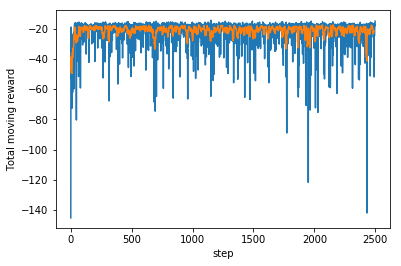

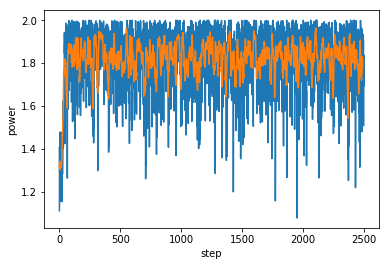

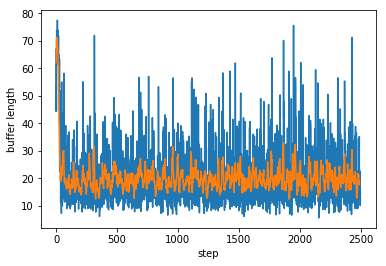

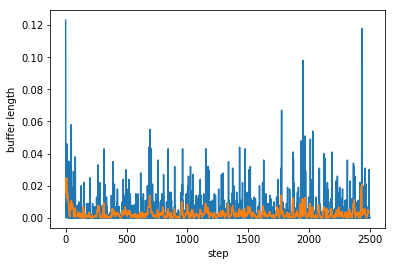

In [3]:
name = 't_10/test_1000_' + time.strftime("%b_%d_%Y_%H_%M_%S", time.localtime(time.time()))
a,b,c,d = plot_everything(res_rec, win=10)
np.savez(name, a,b,c,d)

In [1]:
cur_init_ds_ep = env.reset()
    
cur_r_ep = np.zeros(len(user_list))
cur_p_ep = np.zeros(len(user_list))
cur_n_ep = np.zeros(len(user_list))
cur_ts_ep = np.zeros(len(user_list))
cur_rs_ep = np.zeros(len(user_list))
cur_ps_ep = np.zeros(len(user_list))
cur_ds_ep = np.zeros(len(user_list))
cur_ch_ep = np.zeros(len(user_list))
    
for j in range(1000):
    # first try to transmit from current state
    [cur_r, done, cur_p, cur_n, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of] = env.step_transmit()
        
    cur_r_ep += cur_r
    cur_p_ep += cur_p
    cur_ts_ep += cur_ts
    cur_ps_ep += cur_ps
    cur_rs_ep += cur_rs
    cur_ds_ep += cur_ds
    cur_ch_ep += cur_ch
        
    print('%d:r:%f,p:%s,n:%s,tr:%s,pr:%s,rev:%s,dbuf:%s,ch:%s,ibuf:%s' % (j, cur_r, cur_p, cur_n, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_init_ds_ep))
        
print('r:%f,p:%s,n:%s,tr:%s,rev:%s,dbuf:%s,ch:%s,ibuf:%s' % (cur_r_ep/MAX_EPISODE_LEN, cur_p_ep/MAX_EPISODE_LEN, cur_n_ep/MAX_EPISODE_LEN, cur_ts_ep/MAX_EPISODE_LEN, cur_rs_ep/MAX_EPISODE_LEN, cur_ds_ep/MAX_EPISODE_LEN, cur_ch_ep/MAX_EPISODE_LEN, cur_init_ds_ep))

NameError: name 'env' is not defined

In [3]:
graph = tf.get_default_graph()
inputs = graph.get_tensor_by_name("input_1"+":0")
scaled_out = graph.get_tensor_by_name("output_1"+":0")
print sess.run(scaled_out, feed_dict={inputs: [[7.22254768,2.3384,2.7784888e-05]]})

[[0.78826445 1.        ]]


In [2]:
res_rec = []
res_init_buf = []
# 3. start to explore for each episode
for i in range(MAX_EPISODE):
    
    cur_init_ds_ep = env.reset(3)
        
    res_init_buf.append(cur_init_ds_ep)
    
    cur_r_ep = np.zeros(len(user_list))
    cur_p_ep = np.zeros(len(user_list))
    cur_ts_ep = np.zeros(len(user_list))
    cur_ps_ep = np.zeros(len(user_list))
    cur_rs_ep = np.zeros(len(user_list))
    cur_ds_ep = np.zeros(len(user_list))
    cur_ch_ep = np.zeros(len(user_list))
    cur_of_ep = np.zeros(len(user_list))
    
    res_rec_tmp = []
    for j in range(MAX_EPISODE_LEN):
        
        # first try to transmit from current state
        [cur_r, done, cur_p, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of] = env.step_transmit(False)
        
        res_rec_tmp.append([cur_r, done, cur_p, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of])
        cur_r_ep += cur_r
        cur_p_ep += cur_p
        cur_ts_ep += cur_ts
        cur_ps_ep += cur_ps
        cur_rs_ep += cur_rs
        cur_ds_ep += cur_ds
        cur_ch_ep += cur_ch
        cur_of_ep += cur_of
        
        if done:
            res_rec.append(res_rec_tmp)
            print('%d:r:%.4f,p:%.4f,tr:%.4f,pr:%.4f,rev:%.4f,dbuf:%.4f,ch:%.8f,ibuf:%d' % (i, cur_r_ep/MAX_EPISODE_LEN, cur_p_ep/MAX_EPISODE_LEN, cur_ts_ep/MAX_EPISODE_LEN, cur_ps_ep/MAX_EPISODE_LEN, cur_rs_ep/MAX_EPISODE_LEN, cur_ds_ep/MAX_EPISODE_LEN, cur_ch_ep/MAX_EPISODE_LEN, cur_init_ds_ep[0]))
                
name = 'test_1000_' + str(time.asctime( time.localtime(time.time()) )) + '.npy'
np.save(name, [res_rec, res_init_buf])

0:r:-50.8910,p:1.4033,tr:1.4707,pr:1.3505,rev:2.9594,dbuf:72.5261,ch:0.00002568,ibuf:4
1:r:-57.9454,p:1.3913,tr:1.6529,pr:1.2218,rev:3.0360,dbuf:74.1439,ch:0.00002761,ibuf:30
2:r:-51.0844,p:1.1953,tr:1.5476,pr:1.2320,rev:2.8984,dbuf:73.1955,ch:0.00002990,ibuf:39
3:r:-18.2811,p:1.3469,tr:1.5860,pr:1.3673,rev:2.9762,dbuf:61.5868,ch:0.00002683,ibuf:35
4:r:-17.5547,p:1.2180,tr:1.7657,pr:1.2518,rev:3.0115,dbuf:55.9275,ch:0.00003238,ibuf:63
5:r:-55.6239,p:1.4116,tr:1.4240,pr:1.3390,rev:2.8791,dbuf:69.1011,ch:0.00002492,ibuf:48
6:r:-37.3900,p:1.2706,tr:1.3830,pr:1.5578,rev:3.0240,dbuf:59.5109,ch:0.00002915,ibuf:8
7:r:-32.6223,p:1.4738,tr:1.3452,pr:1.6902,rev:3.0674,dbuf:63.5657,ch:0.00002512,ibuf:71
8:r:-20.8140,p:1.2057,tr:1.4394,pr:1.5456,rev:3.0451,dbuf:49.6221,ch:0.00002902,ibuf:38
9:r:-19.3836,p:1.1973,tr:1.4459,pr:1.4838,rev:2.9358,dbuf:56.0717,ch:0.00002922,ibuf:86


In [3]:
from mec_env_var import *
from helper import *
import tensorflow as tf
import ipdb as pdb
import time

MAX_EPISODE = 50
MAX_EPISODE_LEN = 1000

NUM_T = 1
NUM_R = 1
SIGMA2 = 0.3e-9

config = {'state_dim':3, 'action_dim':2};
train_config = {'minibatch_size':64, 'actor_lr':0.0001, 'tau':0.001, 
                 'critic_lr':0.001, 'gamma':0.99, 'buffer_size':250000, 
                 'random_seed':1234}
user_config = [{'id':'1', 'rate':3, 'dis':100, 'action_bound':1, 
                'data_buf_size':100, 't_factor':0.9, 'penalty':1000}];

print user_config
# 0. initialize the session object
sess = tf.Session() 
saver = tf.train.import_meta_graph('model/my_test_model.meta')
sess.run(tf.global_variables_initializer())

saver.restore(sess, tf.train.latest_checkpoint('model/'))

graph = tf.get_default_graph()
    
# 1. include all user in the system according to the user_config
user_list = [];
for info in user_config:
    info.update(config)
    user_list.append(MecTermLD(sess, info, train_config))
    print 'test'

# 2. create the simulation env
env = MecSvrEnv(user_list, NUM_R, SIGMA2, MAX_EPISODE_LEN)
env.init_target_network()

res_rec = []
res_init_buf = []
# 3. start to explore for each episode
for i in range(MAX_EPISODE):
    
    cur_init_ds_ep = env.reset(3)
        
    res_init_buf.append(cur_init_ds_ep)
    
    cur_r_ep = np.zeros(len(user_list))
    cur_p_ep = np.zeros(len(user_list))
    cur_ts_ep = np.zeros(len(user_list))
    cur_ps_ep = np.zeros(len(user_list))
    cur_rs_ep = np.zeros(len(user_list))
    cur_ds_ep = np.zeros(len(user_list))
    cur_ch_ep = np.zeros(len(user_list))
    cur_of_ep = np.zeros(len(user_list))
    
    res_rec_tmp = []
    for j in range(MAX_EPISODE_LEN):
        
        # first try to transmit from current state
        [cur_r, done, cur_p, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of] = env.step_transmit()
        
        res_rec_tmp.append([cur_r, done, cur_p, temp, cur_ts, cur_ps, cur_rs, cur_ds, cur_ch, cur_of])
        cur_r_ep += cur_r
        cur_p_ep += cur_p
        cur_ts_ep += cur_ts
        cur_ps_ep += cur_ps
        cur_rs_ep += cur_rs
        cur_ds_ep += cur_ds
        cur_ch_ep += cur_ch
        cur_of_ep += cur_of
        
        if done:
            res_rec.append(res_rec_tmp)
            print('%d:r:%.4f,p:%.4f,tr:%.4f,pr:%.4f,rev:%.4f,dbuf:%.4f,ch:%.8f,ibuf:%d' % (i, cur_r_ep/MAX_EPISODE_LEN, cur_p_ep/MAX_EPISODE_LEN, cur_ts_ep/MAX_EPISODE_LEN, cur_ps_ep/MAX_EPISODE_LEN, cur_rs_ep/MAX_EPISODE_LEN, cur_ds_ep/MAX_EPISODE_LEN, cur_ch_ep/MAX_EPISODE_LEN, cur_init_ds_ep[0]))
                
name = 'test_1000_' + str(time.asctime( time.localtime(time.time()) )) + '.npy'
np.save(name, [res_rec, res_init_buf])
sess.close()

[{'data_buf_size': 100, 'penalty': 1000, 'rate': 3, 'action_bound': 1, 'id': '1', 't_factor': 0.9, 'dis': 100}]
INFO:tensorflow:Restoring parameters from model/my_test_model
--Return--
None
> <ipython-input-3-a12846566f97>(30)<module>()
     29 graph = tf.get_default_graph()
---> 30 pdb.set_trace()
     31 

ipdb> graph
ipdb> graph.trainable_variables
*** AttributeError: 'Graph' object has no attribute 'trainable_variables'
ipdb> tf.trainable_variables()
[<tf.Variable 'fully_connected/weights:0' shape=(3, 400) dtype=float32_ref>, <tf.Variable 'fully_connected/BatchNorm/beta:0' shape=(400,) dtype=float32_ref>, <tf.Variable 'fully_connected_1/weights:0' shape=(3, 300) dtype=float32_ref>, <tf.Variable 'fully_connected_1/BatchNorm/beta:0' shape=(300,) dtype=float32_ref>, <tf.Variable 'fully_connected_2/weights:0' shape=(300, 2) dtype=float32_ref>, <tf.Variable 'fully_connected_2/biases:0' shape=(2,) dtype=float32_ref>, <tf.Variable 'fully_connected_3/weights:0' shape=(3, 400) dtype=float32

BdbQuit: 

In [9]:
sess = tf.Session() 
saver = tf.train.import_meta_graph('model/my_test_model.meta')
sess.run(tf.global_variables_initializer())

saver.restore(sess, tf.train.latest_checkpoint('model/'))

graph = tf.get_default_graph()
variable_names = [v.name for v in tf.trainable_variables()]
values = sess.run(variable_names)
print sess.run('fully_connected_2/weights:0')

INFO:tensorflow:Restoring parameters from model/my_test_model
[[0.1545126  0.15780352]
 [0.15616506 0.15971294]
 [0.06559879 0.09880391]
 [0.06487427 0.10064688]
 [0.15168335 0.16229852]
 [0.06257845 0.09748891]
 [0.06430701 0.09924787]
 [0.06548443 0.10012874]
 [0.15782878 0.15414344]
 [0.15429462 0.17596859]
 [0.05945097 0.0991616 ]
 [0.06383383 0.09632684]
 [0.06522399 0.10438306]
 [0.06095436 0.09916781]
 [0.06635379 0.0955418 ]
 [0.06379106 0.09433711]
 [0.06133086 0.09875894]
 [0.06503102 0.09639146]
 [0.15047684 0.17412661]
 [0.15663381 0.15740666]
 [0.17768952 0.15899988]
 [0.15730077 0.14491995]
 [0.05902164 0.10017106]
 [0.06845198 0.09686822]
 [0.15724926 0.14774598]
 [0.1529071  0.16426612]
 [0.1520101  0.15706535]
 [0.16091335 0.16260217]
 [0.15082897 0.16070077]
 [0.06310375 0.09398151]
 [0.06018374 0.10056869]
 [0.05968894 0.10066012]
 [0.15474424 0.16255529]
 [0.15111688 0.1622602 ]
 [0.0838669  0.18973866]
 [0.06870251 0.24295035]
 [0.06702217 0.10505467]
 [0.1529     

In [3]:
np.save('t_08/1', [1])